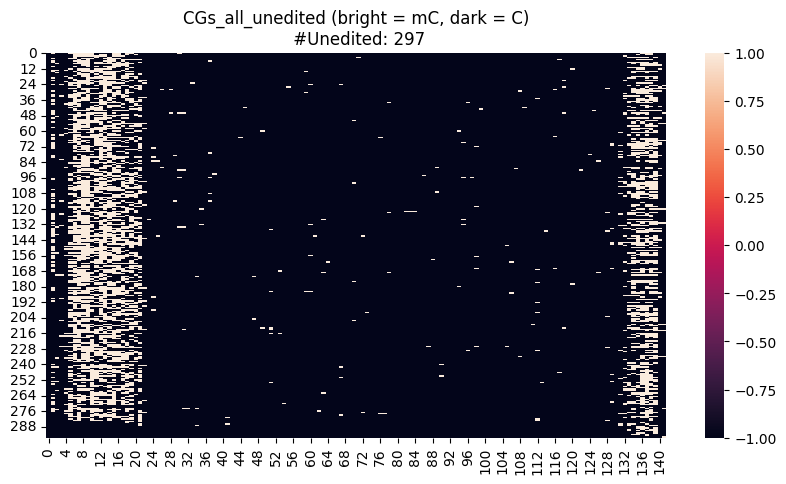

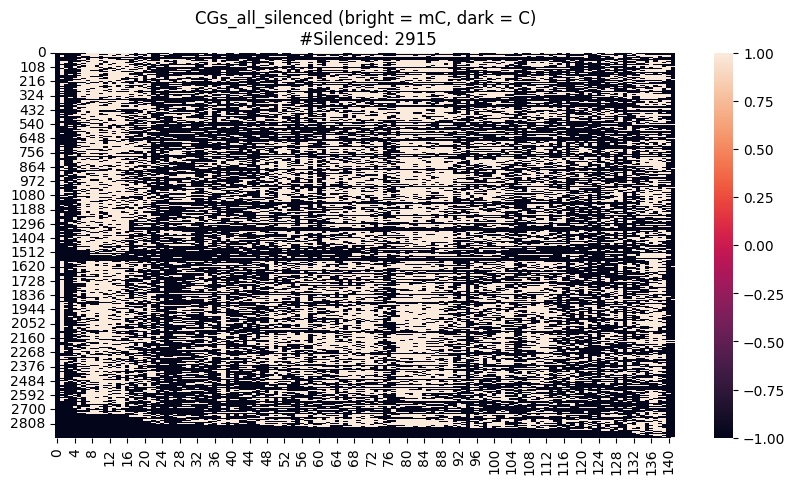

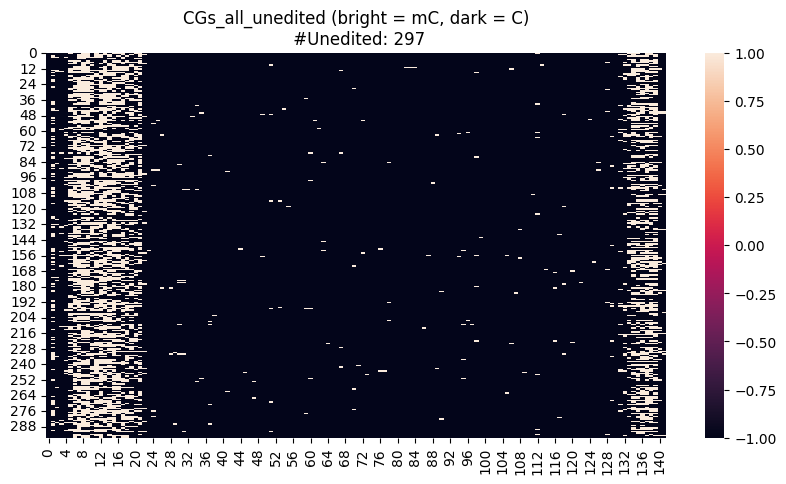

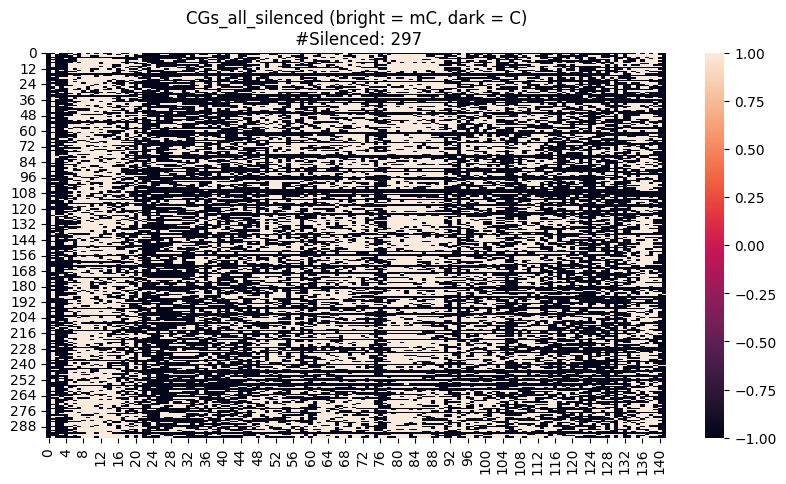

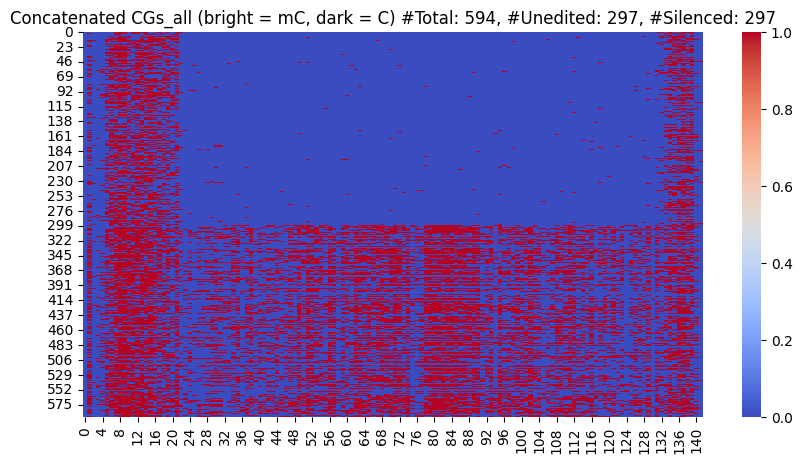

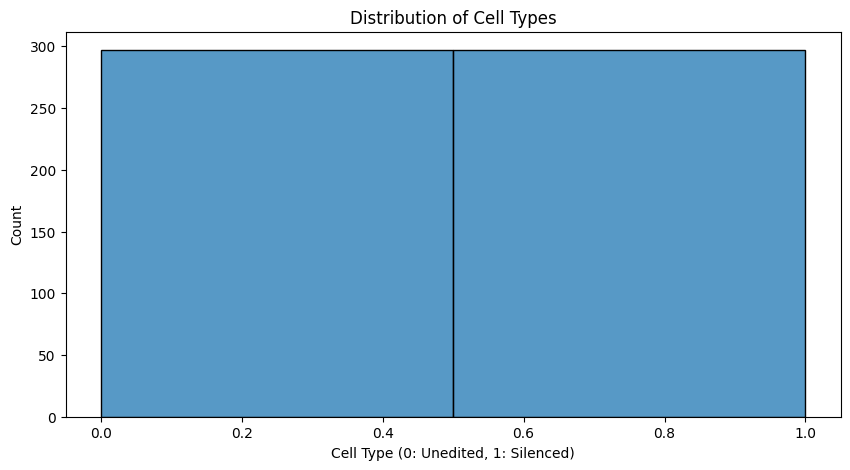

PermutationExplainer explainer: 595it [00:28, 14.42it/s]                         


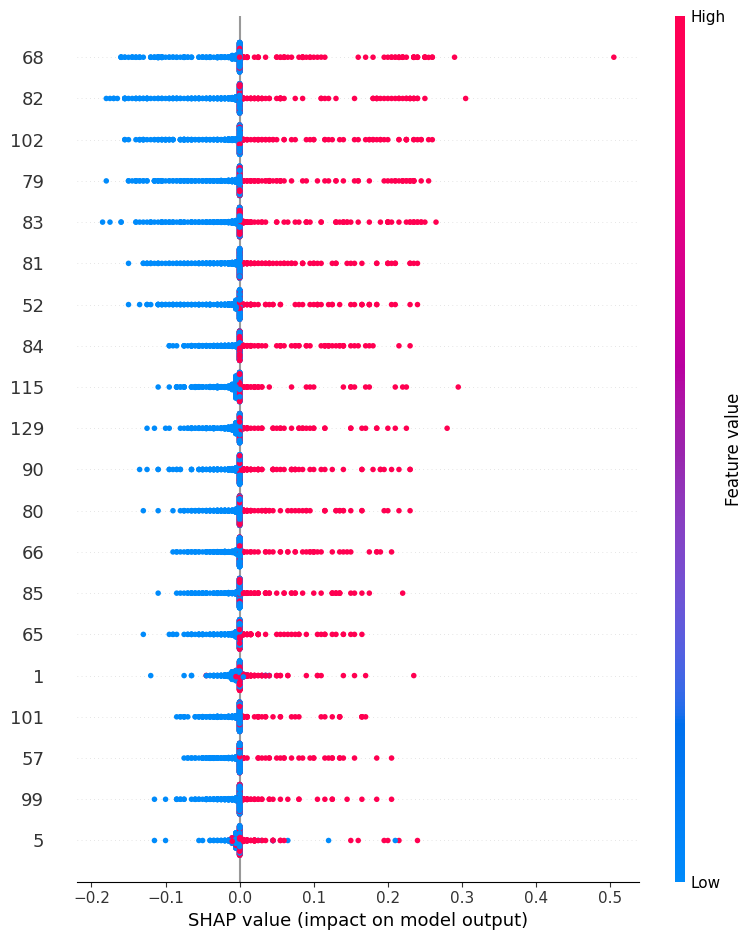

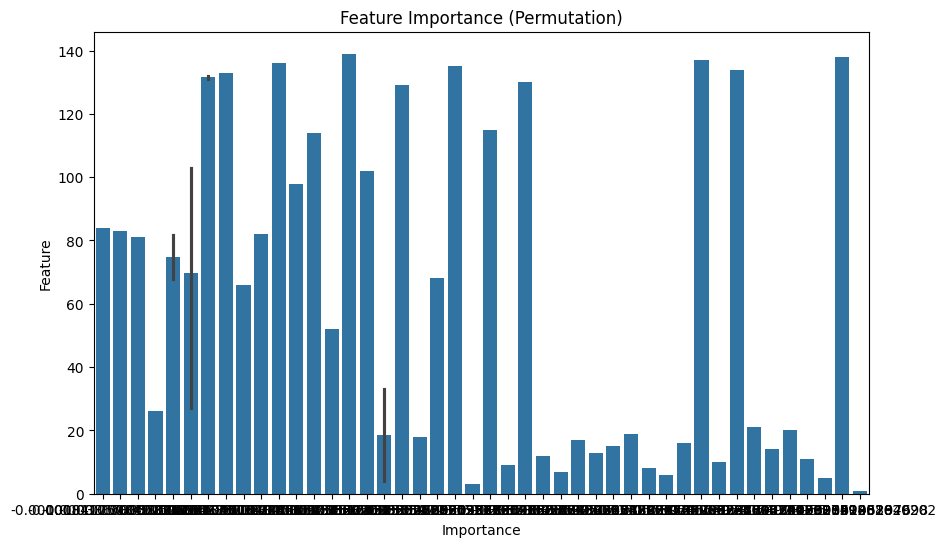

,Feature,Importance
1,1,0.020202
138,138,0.014983
5,5,0.012963
11,11,0.010101
20,20,0.009259
...,...,...
128,128,0.000000
26,26,-0.000168
81,81,-0.000337
83,83,-0.000842


In [16]:
# import pandas as pd
# import numpy as np
# import shap
# import time
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
# from sklearn.inspection import permutation_importance
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier

# def load_data(unedited_path, silenced_path):
#     """Loads dataset from npy files, plots heatmap before balancing, balances sizes, and prepares features/labels."""
#     CGs_all_unedited = np.load(unedited_path)
#     CGs_all_silenced = np.load(silenced_path)
    
#     # Plot heatmaps before balancing
#     plot_CGs_heatmap(CGs_all_unedited, CGs_all_silenced, None)
    
#     # Balance dataset size
#     min_size = min(len(CGs_all_unedited), len(CGs_all_silenced))
#     CGs_all_unedited = CGs_all_unedited[np.random.choice(len(CGs_all_unedited), min_size, replace=False)]
#     CGs_all_silenced = CGs_all_silenced[np.random.choice(len(CGs_all_silenced), min_size, replace=False)]
    
#     X = np.vstack((CGs_all_unedited, CGs_all_silenced))
#     X = pd.DataFrame(X).fillna(0)
#     y = np.array([0] * len(CGs_all_unedited) + [1] * len(CGs_all_silenced))
    
#     return X, y, CGs_all_unedited, CGs_all_silenced

# def plot_data_distribution(X, y):
#     """Plots data distribution."""
#     plt.figure(figsize=(10, 5))
#     sns.histplot(y, bins=2, kde=False)
#     plt.xlabel("Cell Type (0: Unedited, 1: Silenced)")
#     plt.ylabel("Count")
#     plt.title("Distribution of Cell Types")
#     plt.show()

# def plot_CGs_heatmap(CGs_all_unedited, CGs_all_silenced, X):
#     """Plots heatmaps of CGs_all before and after balancing."""
#     plt.figure(figsize=(10, 5))
#     sns.heatmap(pd.DataFrame(CGs_all_unedited).fillna(-1))
#     plt.title(f"CGs_all_unedited (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]}")
#     plt.show()
#     plt.figure(figsize=(10, 5))
#     sns.heatmap(pd.DataFrame(CGs_all_silenced).fillna(-1))
#     plt.title(f"CGs_all_silenced (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]}")
#     plt.show()
#     if X is not None:
#         plt.figure(figsize=(10, 5))
#         sns.heatmap(pd.DataFrame(X).fillna(0), cmap='coolwarm', cbar=True)
#         plt.title(f"Concatenated CGs_all (bright = mC, dark = C) #Total: {X.shape[0]}, #Unedited: {CGs_all_unedited.shape[0]}, #Silenced: {CGs_all_silenced.shape[0]}")
#         plt.show()

# def train_models(X, y):
#     """Trains multiple classification models and evaluates them."""
#     models = {
#         'Logistic Regression': LogisticRegression(max_iter=1000),
#         'Random Forest': RandomForestClassifier(n_estimators=100),
#         'Gradient Boosting': GradientBoostingClassifier(),
#         'Decision Tree': DecisionTreeClassifier(),
#         'SVM': SVC(probability=True),
#         'Neural Network': MLPClassifier(max_iter=1000)
#     }
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     results = {}
    
#     for name, model in models.items():
#         start_time = time.time()
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
#         accuracy = accuracy_score(y_test, y_pred)
#         roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
        
#         results[name] = {
#             'accuracy': accuracy,
#             'roc_auc': roc_auc,
#             'confusion_matrix': confusion_matrix(y_test, y_pred),
#             'classification_report': classification_report(y_test, y_pred, output_dict=True),
#             'train_time': time.time() - start_time
#         }
    
#     return models, results

# def feature_importance_analysis(model, X_train, y_train):
#     """Computes feature importance using SHAP and Permutation Importance."""
#     # SHAP analysis
#     explainer = shap.Explainer(model.predict, X_train)
#     shap_values = explainer(X_train)
#     shap.summary_plot(shap_values, X_train)
    
#     # Permutation Importance
#     perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
#     feature_importance = pd.DataFrame({'Feature': range(X_train.shape[1]), 'Importance': perm_importance.importances_mean})
#     feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
#     plt.title('Feature Importance (Permutation)')
#     plt.show()
    
#     return feature_importance

# # Example usage:
# unedited_path = "/home/michalula/code/epiCausality/epiCode/notebooks_debug/dimelo_v2_output/CG_142_units_combined_unedited_K562_R9P2_nCATS_2024927_numFWD240_numRVS57_padded_reads_unedited_K562_R9P2_nCATS_2024927_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-07.npy"
# silenced_path = "/home/michalula/code/epiCausality/epiCode/notebooks_debug/dimelo_v2_output/CG_142_units_combined_LOW_high_K562_nCATS_20241226_numFWD1576_numRVS1339_padded_reads_LOW_high_K562_nCATS_20241226_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-07.npy"
# X, y, CGs_unedited, CGs_silenced = load_data(unedited_path, silenced_path)
# plot_CGs_heatmap(CGs_unedited, CGs_silenced, X)
# plot_data_distribution(X, y)
# models, results = train_models(X, y)
# feature_importance_analysis(models['Random Forest'], X, y)


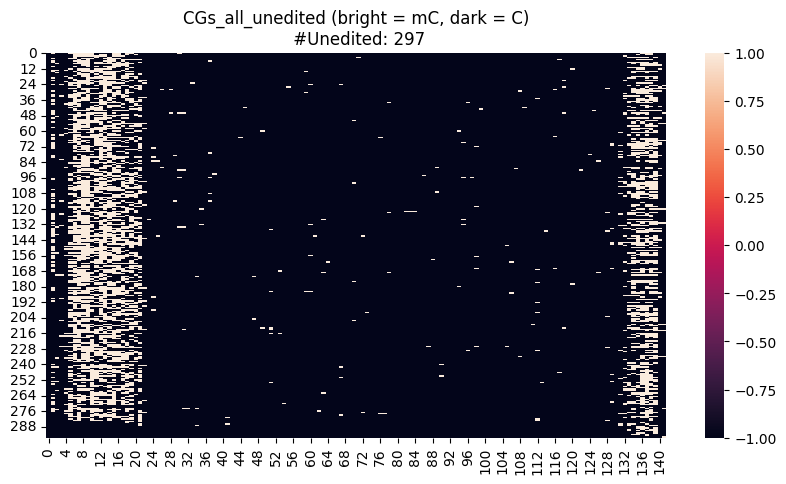

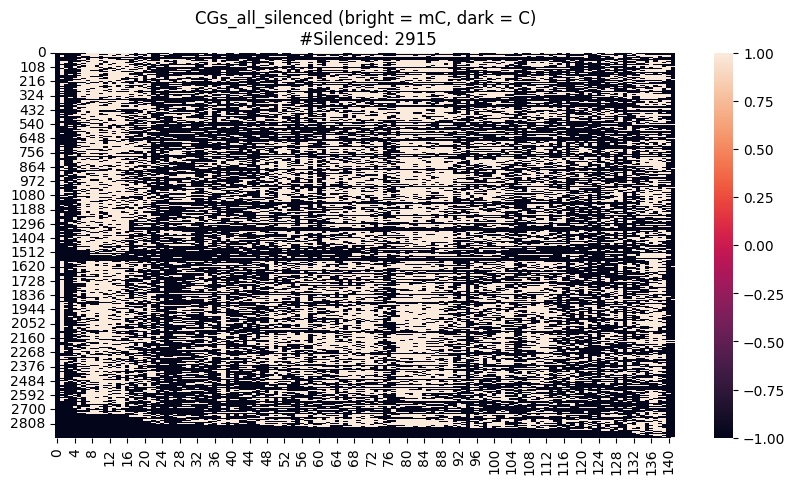

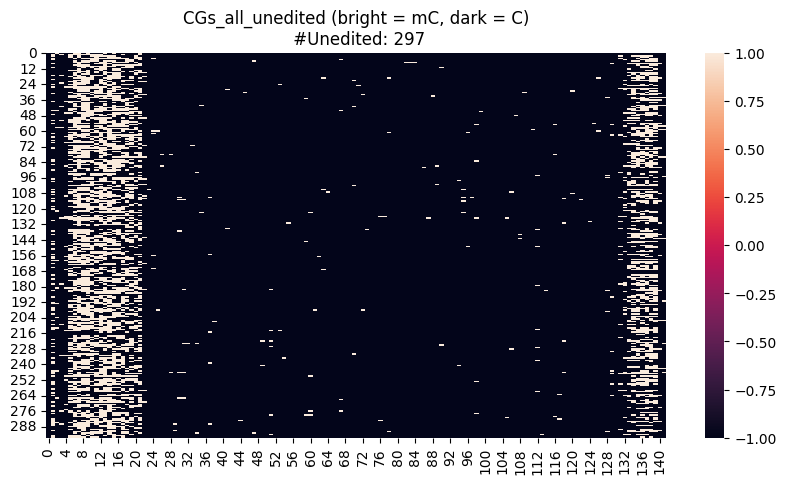

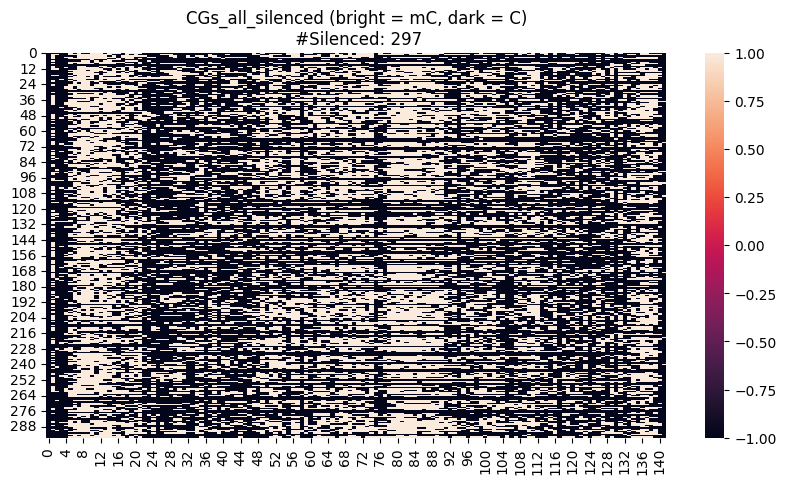

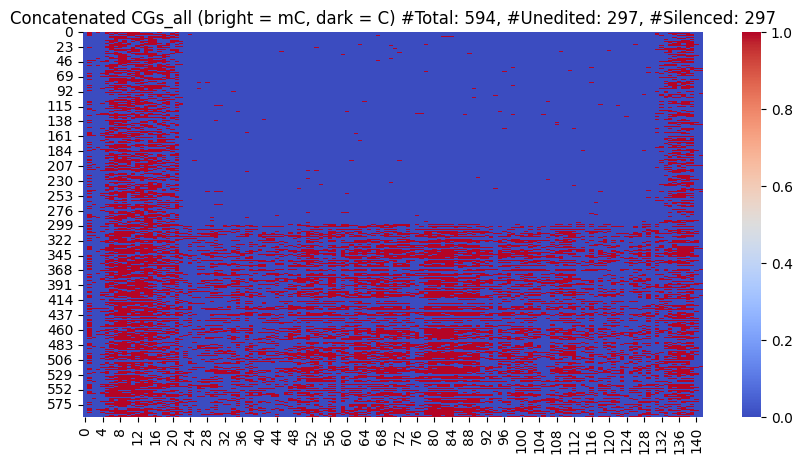

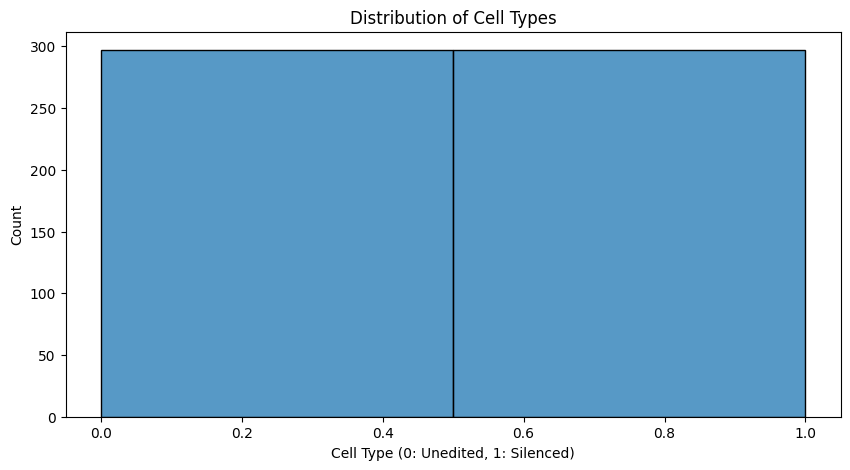

PermutationExplainer explainer: 595it [00:25, 13.19it/s]                         


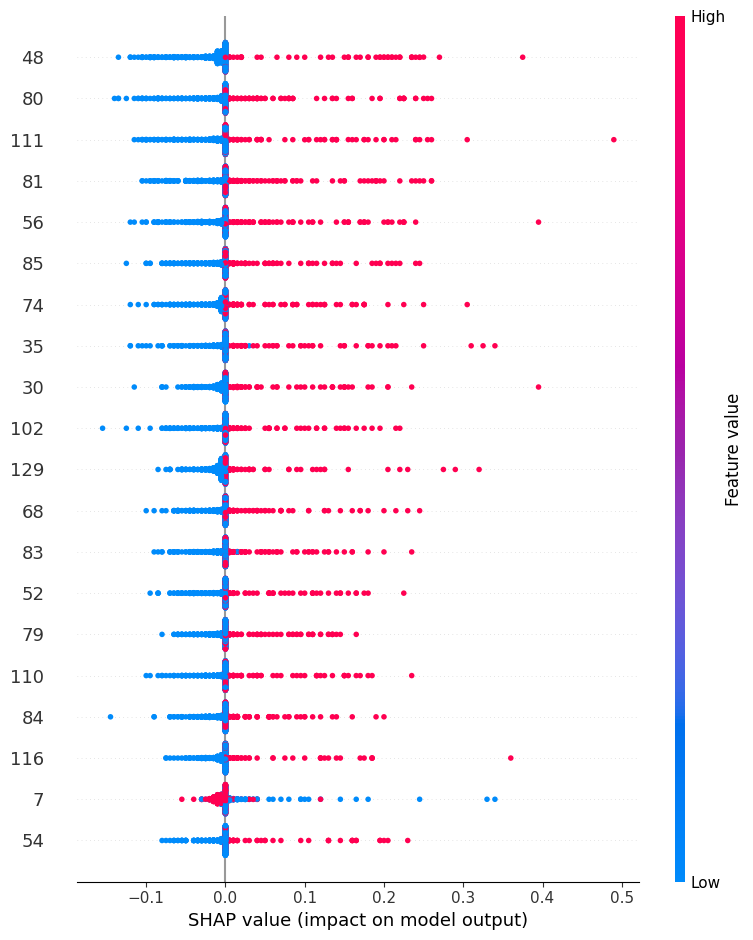

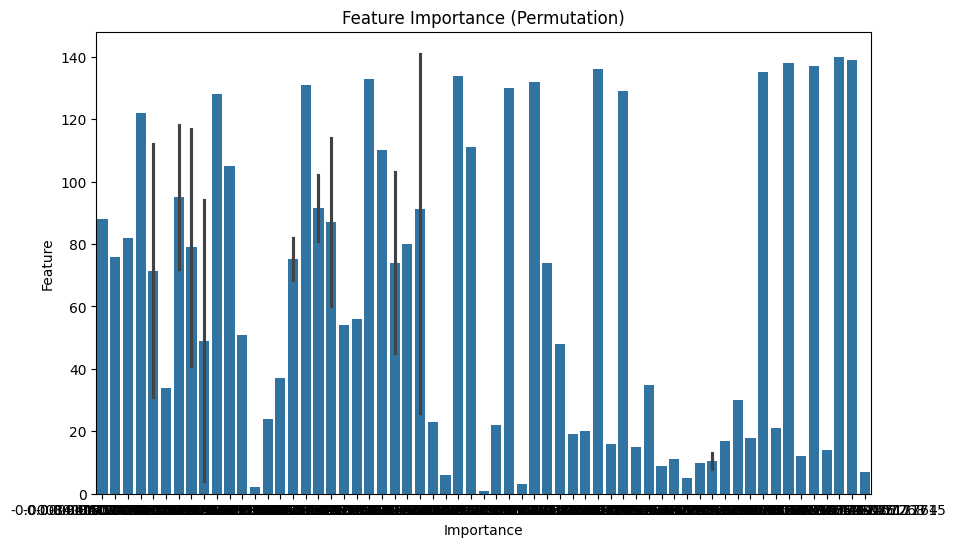

,Feature,Importance
7,7,0.017172
139,139,0.011785
140,140,0.011279
14,14,0.010774
137,137,0.010774
...,...,...
31,31,-0.000673
122,122,-0.000673
82,82,-0.000842
76,76,-0.000842


In [18]:
# import pandas as pd
# import numpy as np
# import shap
# import time
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
# from sklearn.inspection import permutation_importance
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier

# def load_data(unedited_path, silenced_path):
#     """Loads dataset from npy files, plots heatmap before balancing, balances sizes, and prepares features/labels."""
#     CGs_all_unedited = np.load(unedited_path)
#     CGs_all_silenced = np.load(silenced_path)
    
#     # Plot heatmaps before balancing
#     plot_CGs_heatmap(CGs_all_unedited, CGs_all_silenced, None)
    
#     # Balance dataset size
#     min_size = min(len(CGs_all_unedited), len(CGs_all_silenced))
#     CGs_all_unedited = CGs_all_unedited[np.random.choice(len(CGs_all_unedited), min_size, replace=False)]
#     CGs_all_silenced = CGs_all_silenced[np.random.choice(len(CGs_all_silenced), min_size, replace=False)]
    
#     X = np.vstack((CGs_all_unedited, CGs_all_silenced))
#     X = pd.DataFrame(X).fillna(0)
#     y = np.array([0] * len(CGs_all_unedited) + [1] * len(CGs_all_silenced))
    
#     return X, y, CGs_all_unedited, CGs_all_silenced

# def plot_data_distribution(X, y):
#     """Plots data distribution."""
#     plt.figure(figsize=(10, 5))
#     sns.histplot(y, bins=2, kde=False)
#     plt.xlabel("Cell Type (0: Unedited, 1: Silenced)")
#     plt.ylabel("Count")
#     plt.title("Distribution of Cell Types")
#     plt.show()

# def plot_CGs_heatmap(CGs_all_unedited, CGs_all_silenced, X):
#     """Plots heatmaps of CGs_all before and after balancing."""
#     plt.figure(figsize=(10, 5))
#     sns.heatmap(pd.DataFrame(CGs_all_unedited).fillna(-1))
#     plt.title(f"CGs_all_unedited (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]}")
#     plt.show()
#     plt.figure(figsize=(10, 5))
#     sns.heatmap(pd.DataFrame(CGs_all_silenced).fillna(-1))
#     plt.title(f"CGs_all_silenced (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]}")
#     plt.show()
#     if X is not None:
#         plt.figure(figsize=(10, 5))
#         sns.heatmap(pd.DataFrame(X).fillna(0), cmap='coolwarm', cbar=True)
#         plt.title(f"Concatenated CGs_all (bright = mC, dark = C) #Total: {X.shape[0]}, #Unedited: {CGs_all_unedited.shape[0]}, #Silenced: {CGs_all_silenced.shape[0]}")
#         plt.show()

# def train_models(X, y):
#     """Trains multiple classification models, evaluates them, and saves prediction scores in a table."""
#     """Trains multiple classification models and evaluates them."""
#     models = {
#         'Logistic Regression': LogisticRegression(max_iter=1000),
#         'Random Forest': RandomForestClassifier(n_estimators=100),
#         'Gradient Boosting': GradientBoostingClassifier(),
#         'Decision Tree': DecisionTreeClassifier(),
#         'SVM': SVC(probability=True),
#         'Neural Network': MLPClassifier(max_iter=1000)
#     }
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     results = {}
    
#     for name, model in models.items():
#         start_time = time.time()
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
#         accuracy = accuracy_score(y_test, y_pred)
#         roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
        
#         results[name] = {
#             'accuracy': accuracy,
#             'roc_auc': roc_auc,
#             'confusion_matrix': confusion_matrix(y_test, y_pred),
#             'classification_report': classification_report(y_test, y_pred, output_dict=True),
#             'train_time': time.time() - start_time
#         }
    
#     results_df = pd.DataFrame.from_dict(results, orient='index')
#     results_df.to_csv("model_performance.csv", index=True)
#     return models, results_df

# def feature_importance_analysis(model, X_train, y_train):
#     """Computes feature importance using SHAP and Permutation Importance."""
#     # SHAP analysis
#     explainer = shap.Explainer(model.predict, X_train)
#     shap_values = explainer(X_train)
#     shap.summary_plot(shap_values, X_train)
    
#     # Permutation Importance
#     perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
#     feature_importance = pd.DataFrame({'Feature': range(X_train.shape[1]), 'Importance': perm_importance.importances_mean})
#     feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
#     plt.title('Feature Importance (Permutation)')
#     plt.show()
    
#     return feature_importance

# # Example usage:
# unedited_path = "/home/michalula/code/epiCausality/epiCode/notebooks_debug/dimelo_v2_output/CG_142_units_combined_unedited_K562_R9P2_nCATS_2024927_numFWD240_numRVS57_padded_reads_unedited_K562_R9P2_nCATS_2024927_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-07.npy"
# silenced_path = "/home/michalula/code/epiCausality/epiCode/notebooks_debug/dimelo_v2_output/CG_142_units_combined_LOW_high_K562_nCATS_20241226_numFWD1576_numRVS1339_padded_reads_LOW_high_K562_nCATS_20241226_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-07.npy"
# X, y, CGs_unedited, CGs_silenced = load_data(unedited_path, silenced_path)
# plot_CGs_heatmap(CGs_unedited, CGs_silenced, X)
# plot_data_distribution(X, y)
# models, results = train_models(X, y)
# feature_importance_analysis(models['Random Forest'], X, y)


In [19]:
results

,accuracy,roc_auc,confusion_matrix,classification_report,train_time
Logistic Regression,0.915966,0.931882,"[[60, 1], [9, 49]]","{'0': {'precision': 0.8695652173913043, 'recal...",0.007583
Random Forest,0.924370,0.954777,"[[60, 1], [8, 50]]","{'0': {'precision': 0.8823529411764706, 'recal...",0.071200
Gradient Boosting,0.890756,0.941492,"[[59, 2], [11, 47]]","{'0': {'precision': 0.8428571428571429, 'recal...",0.110646
Decision Tree,0.831933,0.832674,"[[49, 12], [8, 50]]","{'0': {'precision': 0.8596491228070176, 'recal...",0.006212
SVM,0.915966,0.949972,"[[61, 0], [10, 48]]","{'0': {'precision': 0.8591549295774648, 'recal...",0.021535
Neural Network,0.890756,0.950537,"[[56, 5], [8, 50]]","{'0': {'precision': 0.875, 'recall': 0.9180327...",0.463644


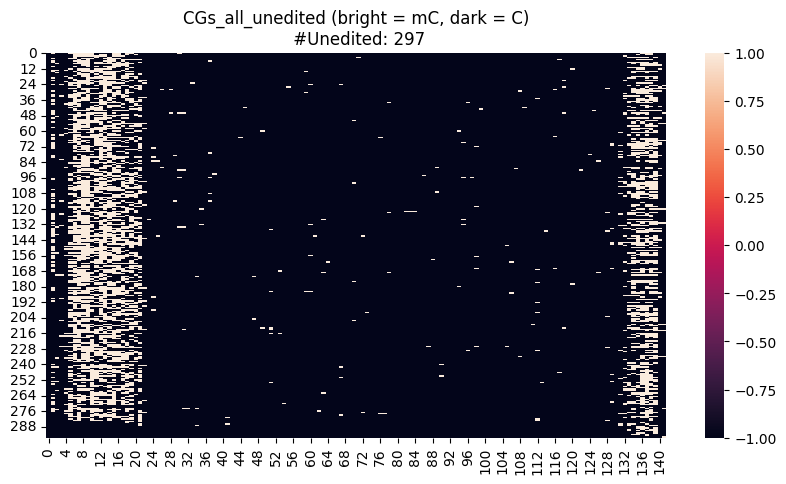

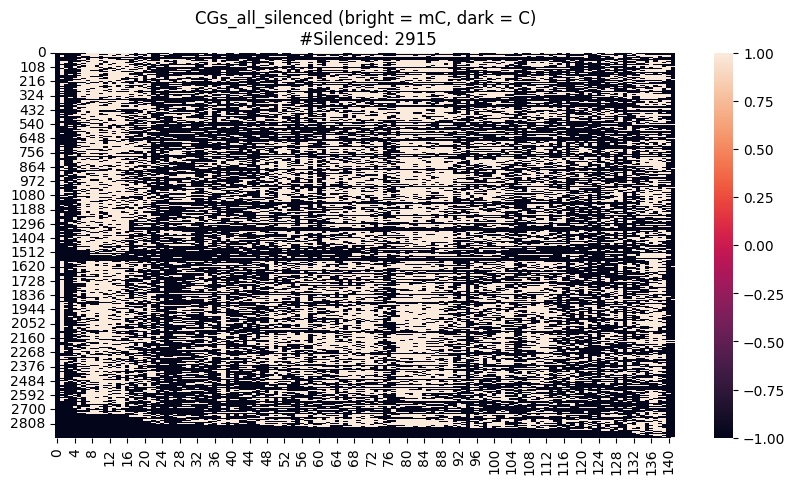

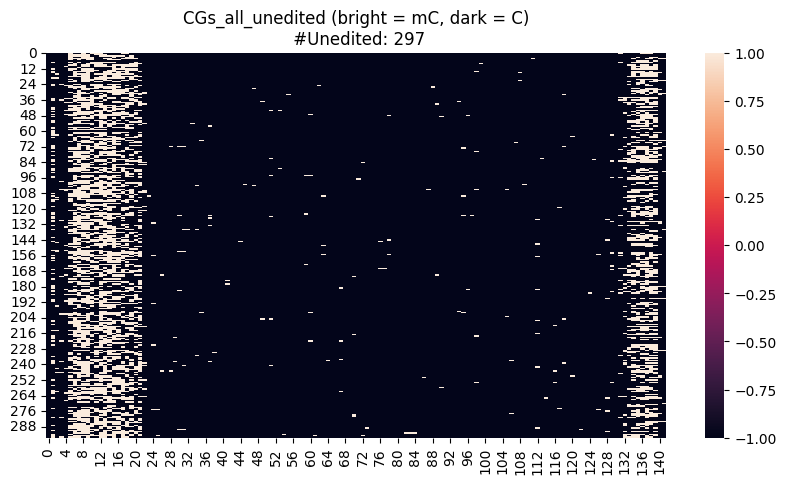

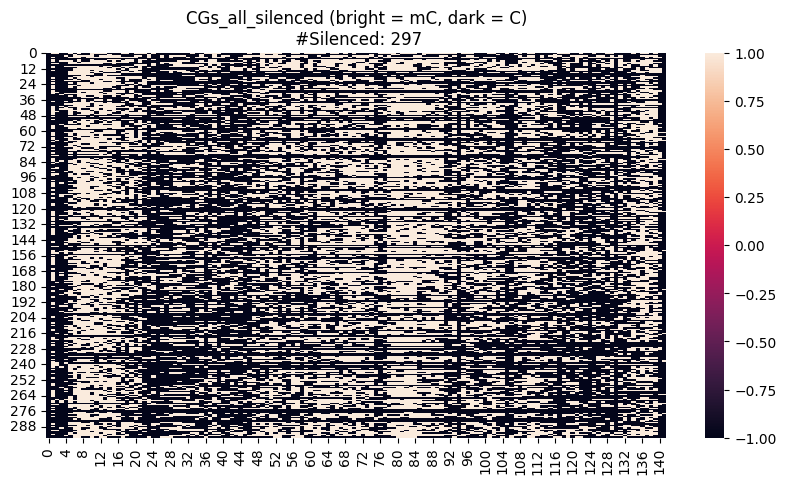

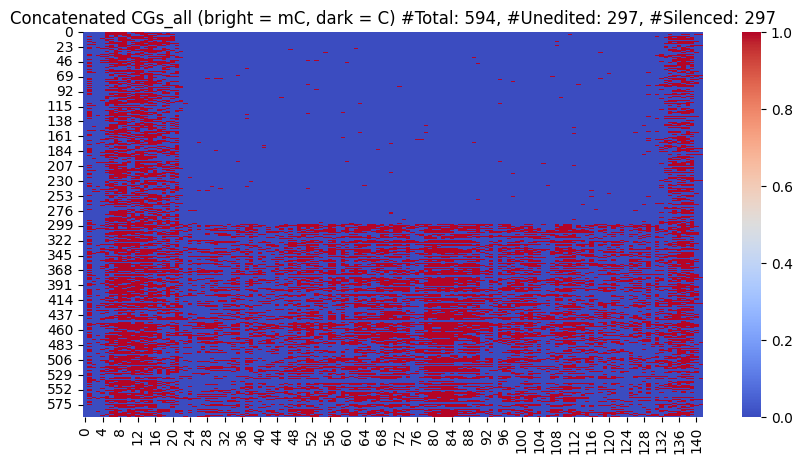

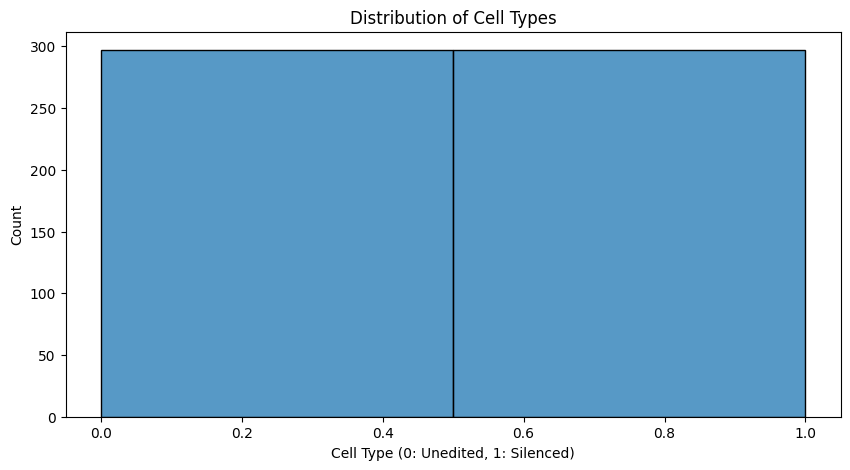

                     accuracy_mean  accuracy_std  roc_auc_mean  roc_auc_std  \
Logistic Regression       0.914214      0.029197      0.943582     0.020708   
Random Forest             0.920937      0.025162      0.958253     0.018373   
Gradient Boosting         0.917590      0.042253      0.940874     0.022600   
Decision Tree             0.865404      0.038138      0.869746     0.025316   
SVM                       0.914229      0.029682      0.956465     0.021472   
Neural Network            0.897379      0.032369      0.936738     0.024986   

                     train_time  
Logistic Regression    0.038377  
Random Forest          0.672751  
Gradient Boosting      1.179667  
Decision Tree          0.036269  
SVM                    0.176289  
Neural Network         5.805413  


PermutationExplainer explainer: 595it [00:26, 13.25it/s]                         


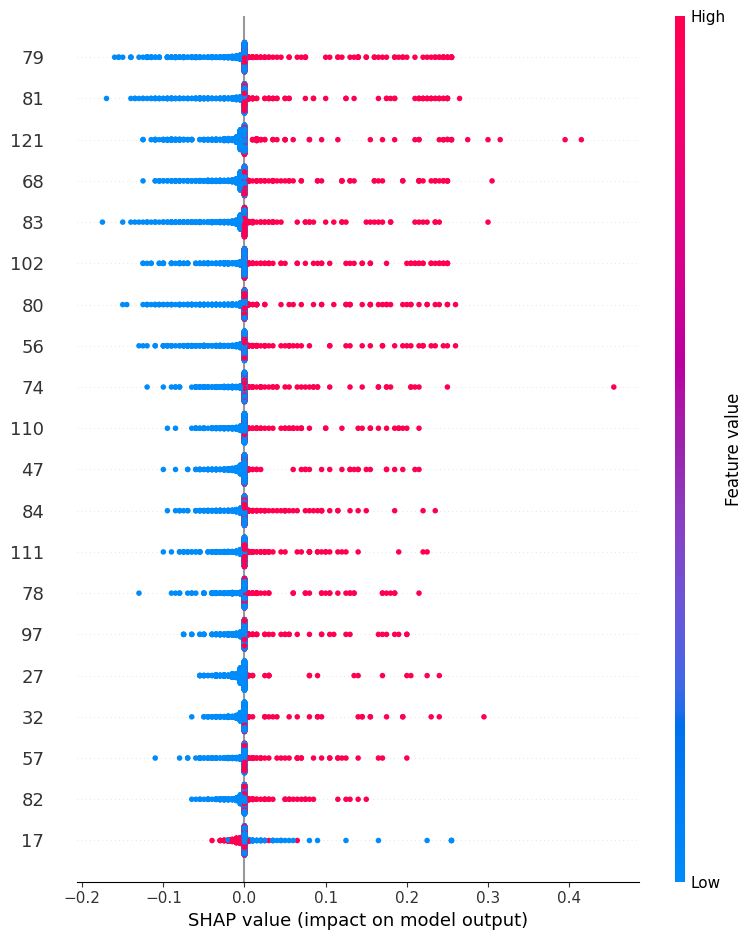

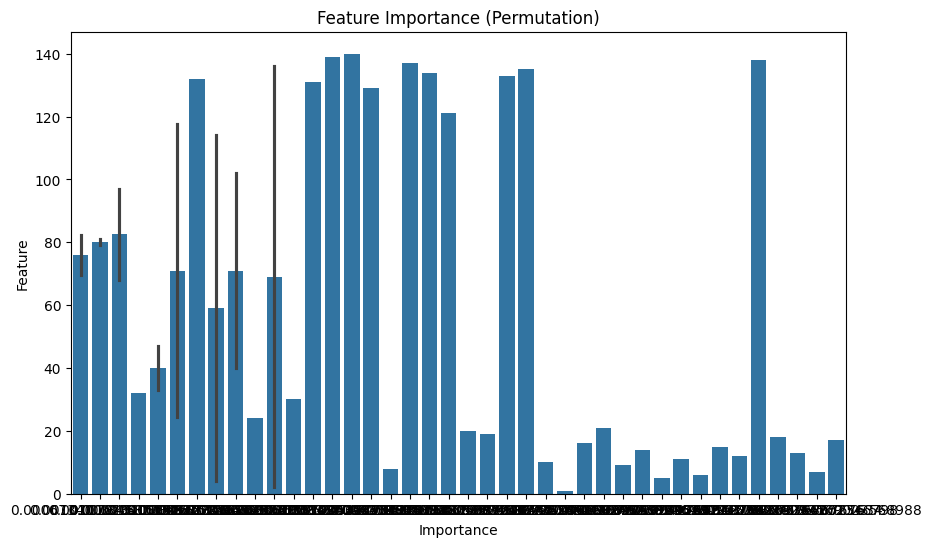

,Feature,Importance
17,17,0.019024
7,7,0.018013
13,13,0.017677
18,18,0.015320
138,138,0.014310
...,...,...
128,128,0.000000
130,130,0.000000
126,126,0.000000
127,127,0.000000


In [29]:
import pandas as pd
import numpy as np
import shap
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import sklearn

def load_data(unedited_path, silenced_path):
    """Loads dataset from npy files, plots heatmap before balancing, balances sizes, and prepares features/labels."""
    CGs_all_unedited = np.load(unedited_path)
    CGs_all_silenced = np.load(silenced_path)
    
    # Plot heatmaps before balancing
    plot_CGs_heatmap(CGs_all_unedited, CGs_all_silenced, None)
    
    # Balance dataset size
    min_size = min(len(CGs_all_unedited), len(CGs_all_silenced))
    CGs_all_unedited = CGs_all_unedited[np.random.choice(len(CGs_all_unedited), min_size, replace=False)]
    CGs_all_silenced = CGs_all_silenced[np.random.choice(len(CGs_all_silenced), min_size, replace=False)]
    
    X = np.vstack((CGs_all_unedited, CGs_all_silenced))
    X = pd.DataFrame(X).fillna(0)
    y = np.array([0] * len(CGs_all_unedited) + [1] * len(CGs_all_silenced))
    
    return X, y, CGs_all_unedited, CGs_all_silenced

def plot_data_distribution(X, y):
    """Plots data distribution."""
    plt.figure(figsize=(10, 5))
    sns.histplot(y, bins=2, kde=False)
    plt.xlabel("Cell Type (0: Unedited, 1: Silenced)")
    plt.ylabel("Count")
    plt.title("Distribution of Cell Types")
    plt.show()

def plot_CGs_heatmap(CGs_all_unedited, CGs_all_silenced, X):
    """Plots heatmaps of CGs_all before and after balancing."""
    plt.figure(figsize=(10, 5))
    sns.heatmap(pd.DataFrame(CGs_all_unedited).fillna(-1))
    plt.title(f"CGs_all_unedited (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]}")
    plt.show()
    plt.figure(figsize=(10, 5))
    sns.heatmap(pd.DataFrame(CGs_all_silenced).fillna(-1))
    plt.title(f"CGs_all_silenced (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]}")
    plt.show()
    if X is not None:    
        plt.figure(figsize=(10, 5))
        sns.heatmap(pd.DataFrame(X).fillna(0), cmap='coolwarm', cbar=True)
        plt.title(f"Concatenated CGs_all (bright = mC, dark = C) #Total: {X.shape[0]}, #Unedited: {CGs_all_unedited.shape[0]}, #Silenced: {CGs_all_silenced.shape[0]}")
        plt.show()

# def train_models(X, y, cv_folds=5, save_results_path="model_performance_cv.csv"):
#     """Trains multiple classification models using cross-validation and evaluates them."""
    
#     models = {
#         'Logistic Regression': LogisticRegression(max_iter=1000),
#         'Random Forest': RandomForestClassifier(n_estimators=100),
#         'Gradient Boosting': GradientBoostingClassifier(),
#         'Decision Tree': DecisionTreeClassifier(),
#         'SVM': SVC(probability=True),
#         'Neural Network': MLPClassifier(max_iter=1000)
#     }
    
#     # Shuffle dataset
#     X, y = sklearn.utils.shuffle(X, y, random_state=42)
    
#     # Define Stratified K-Fold for cross-validation
#     skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
#     results = {}

#     for name, model in models.items():
#         start_time = time.time()
        
#         # Cross-validation accuracy
#         accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
#         accuracy_mean = accuracy_scores.mean()
#         accuracy_std = accuracy_scores.std()

#         # Cross-validation AUC (if applicable)
#         if hasattr(model, 'predict_proba'):
#             roc_auc_scores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
#             roc_auc_mean = roc_auc_scores.mean()
#             roc_auc_std = roc_auc_scores.std()
#         else:
#             roc_auc_mean, roc_auc_std = 'N/A', 'N/A'
        
#         # Store results
#         results[name] = {
#             'accuracy_mean': accuracy_mean,
#             'accuracy_std': accuracy_std,
#             'roc_auc_mean': roc_auc_mean,
#             'roc_auc_std': roc_auc_std,
#             'train_time': time.time() - start_time
#         }

#     # Save results as DataFrame
#     results_df = pd.DataFrame.from_dict(results, orient='index')
#     print(results_df)
#     if save_results_path:
#      results_df.to_csv(save_results_path, index=True)

#     return models, results_df

def train_models(X, y, cv_folds=5, save_results_path="model_performance_cv.csv"):
    """Trains multiple classification models using cross-validation, evaluates them, and stores trained models."""
    
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC(probability=True),
        'Neural Network': MLPClassifier(max_iter=1000)
    }
    
    # Shuffle dataset
    X, y = sklearn.utils.shuffle(X, y, random_state=42)
    
    # Define Stratified K-Fold for cross-validation
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    results = {}

    for name, model in models.items():
        start_time = time.time()
        
        # Cross-validation accuracy
        accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
        accuracy_mean = accuracy_scores.mean()
        accuracy_std = accuracy_scores.std()

        # Cross-validation AUC (if applicable)
        if hasattr(model, 'predict_proba'):
            roc_auc_scores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
            roc_auc_mean = roc_auc_scores.mean()
            roc_auc_std = roc_auc_scores.std()
        else:
            roc_auc_mean, roc_auc_std = 'N/A', 'N/A'
        
        # Train model on the full dataset after cross-validation
        model.fit(X, y)

        # Store trained model and results
        models[name] = model  # Ensure models dictionary contains trained models
        results[name] = {
            'accuracy_mean': accuracy_mean,
            'accuracy_std': accuracy_std,
            'roc_auc_mean': roc_auc_mean,
            'roc_auc_std': roc_auc_std,
            'train_time': time.time() - start_time
        }

    # Save results as DataFrame
    results_df = pd.DataFrame.from_dict(results, orient='index')
    print(results_df)
    if save_results_path:
        results_df.to_csv(save_results_path, index=True)

    return models, results_df



def feature_importance_analysis(model, X_train, y_train):
    """Computes feature importance using SHAP and Permutation Importance."""
    # SHAP analysis
    explainer = shap.Explainer(model.predict, X_train)
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)
    
    # Permutation Importance
    perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
    feature_importance = pd.DataFrame({'Feature': range(X_train.shape[1]), 'Importance': perm_importance.importances_mean})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
    plt.title('Feature Importance (Permutation)')
    plt.show()
    
    return feature_importance

# Example usage:
unedited_path = "/home/michalula/code/epiCausality/epiCode/notebooks_debug/dimelo_v2_output/CG_142_units_combined_unedited_K562_R9P2_nCATS_2024927_numFWD240_numRVS57_padded_reads_unedited_K562_R9P2_nCATS_2024927_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-07.npy"
silenced_path = "/home/michalula/code/epiCausality/epiCode/notebooks_debug/dimelo_v2_output/CG_142_units_combined_LOW_high_K562_nCATS_20241226_numFWD1576_numRVS1339_padded_reads_LOW_high_K562_nCATS_20241226_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-07.npy"
X, y, CGs_unedited, CGs_silenced = load_data(unedited_path, silenced_path)
plot_CGs_heatmap(CGs_unedited, CGs_silenced, X)
plot_data_distribution(X, y)
models, results = train_models(X, y)
feature_importance_analysis(models['Random Forest'], X, y)
